## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

## Variables

In [2]:
airport_codes = {
    "PHILADELPHIA INTERNATIONAL AIRPORT, PA US": "PHL",
    "SEATTLE TACOMA AIRPORT, WA US": "SEA",
    "JFK INTERNATIONAL AIRPORT, NY US": "JFK",
    "DENVER INTERNATIONAL AIRPORT, CO US": "DEN",
    "NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US": "EWR",
    "MCCARRAN INTERNATIONAL AIRPORT, NV US": "LAS",
    "ORLANDO INTERNATIONAL AIRPORT, FL US": "MCO",
    "ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPORT, GA US": "ATL",
    "FORT LAUDERDALE INTERNATIONAL AIRPORT, FL US": "FLL",
    "DETROIT METRO AIRPORT, MI US": "DTW",
    "WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US": "IAD",
    "CHICAGO OHARE INTERNATIONAL AIRPORT, IL US": "ORD",
    "LOS ANGELES INTERNATIONAL AIRPORT, CA US": "LAX",
    "CHARLOTTE DOUGLAS AIRPORT, NC US": "CLT",
    # "BOSTON LOGAN INTERNATIONAL AIRPORT, MA US": "BOS",
    "MIAMI INTERNATIONAL AIRPORT, FL US": "MIA",
    "HOUSTON INTERCONTINENTAL AIRPORT, TX US": "IAH",
    "SAN FRANCISCO INTERNATIONAL AIRPORT, CA US": "SFO",
}

In [3]:
dallas_fort_worth = 72259303985 # Dallas 
boston_logan = 72509014739 # Boston

## Load data

In [4]:
data = pd.read_csv('../data/raw/us_airport_weather_2021_2022.csv', low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491467 entries, 0 to 491466
Columns: 124 entries, STATION to WindEquipmentChangeDate
dtypes: float64(77), int64(1), object(46)
memory usage: 464.9+ MB


## Feature selection

In [5]:
# print the name of the columns in a beautiful way
for i in data.columns:
    print(i)

STATION
NAME
LATITUDE
LONGITUDE
ELEVATION
DATE
REPORT_TYPE
SOURCE
AWND
BackupDirection
BackupDistance
BackupDistanceUnit
BackupElements
BackupElevation
BackupEquipment
BackupLatitude
BackupLongitude
BackupName
CDSD
CLDD
DSNW
DYHF
DYTS
DailyAverageDewPointTemperature
DailyAverageDryBulbTemperature
DailyAverageRelativeHumidity
DailyAverageSeaLevelPressure
DailyAverageStationPressure
DailyAverageWetBulbTemperature
DailyAverageWindSpeed
DailyCoolingDegreeDays
DailyDepartureFromNormalAverageTemperature
DailyHeatingDegreeDays
DailyMaximumDryBulbTemperature
DailyMinimumDryBulbTemperature
DailyPeakWindDirection
DailyPeakWindSpeed
DailyPrecipitation
DailySnowDepth
DailySnowfall
DailySustainedWindDirection
DailySustainedWindSpeed
DailyWeather
HDSD
HTDD
HourlyAltimeterSetting
HourlyDewPointTemperature
HourlyDryBulbTemperature
HourlyPrecipitation
HourlyPresentWeatherType
HourlyPressureChange
HourlyPressureTendency
HourlyRelativeHumidity
HourlySeaLevelPressure
HourlySkyConditions
HourlyStationPress

In [6]:
column_used = [
    "STATION",
    "NAME",
    "DATE",
    # "HourlyAltimeterSetting",
    "HourlyDewPointTemperature",
    "HourlyDryBulbTemperature",
    "HourlyPrecipitation",
    "HourlyPresentWeatherType",
    # "HourlyPressureChange",
    # "HourlyPressureTendency",
    "HourlyRelativeHumidity",
    # "HourlySeaLevelPressure",
    "HourlySkyConditions",
    "HourlyStationPressure",
    "HourlyVisibility",
    # "HourlyWetBulbTemperature",
    "HourlyWindDirection",
    "HourlyWindGustSpeed",
    "HourlyWindSpeed",
]

data_selected = data[column_used]


In [7]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491467 entries, 0 to 491466
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    491467 non-null  int64  
 1   NAME                       491467 non-null  object 
 2   DATE                       491467 non-null  object 
 3   HourlyDewPointTemperature  475138 non-null  float64
 4   HourlyDryBulbTemperature   475212 non-null  float64
 5   HourlyPrecipitation        333949 non-null  object 
 6   HourlyPresentWeatherType   73284 non-null   object 
 7   HourlyRelativeHumidity     475130 non-null  float64
 8   HourlySkyConditions        402918 non-null  object 
 9   HourlyStationPressure      469348 non-null  float64
 10  HourlyVisibility           475283 non-null  object 
 11  HourlyWindDirection        472976 non-null  object 
 12  HourlyWindGustSpeed        56505 non-null   object 
 13  HourlyWindSpeed            47

In [8]:
data_selected.describe()

,STATION,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyStationPressure,HourlyWindSpeed
count,4.914670e+05,475138.000000,475212.000000,475130.000000,469348.000000,474932.000000
mean,7.262028e+10,8.992824,16.212709,67.077937,992.583908,3.823899
std,6.748837e+08,10.582881,10.087857,21.666179,43.048045,2.921468
min,7.220201e+10,-32.800000,-30.000000,2.000000,808.330000,0.000000
25%,7.225930e+10,1.100000,9.400000,53.000000,989.840000,2.000000
50%,7.240801e+10,10.600000,17.200000,71.000000,1005.420000,4.000000
75%,7.253709e+10,17.800000,23.900000,85.000000,1014.900000,5.000000
max,7.478301e+10,28.300000,46.700000,100.000000,1041.650000,1000.000000


In [9]:
data_selected.head()

,STATION,NAME,DATE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyRelativeHumidity,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
0,72408013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2021-01-01T00:54:00,-5.0,0.6,0.00,NaN,66.0,SCT:04 76.20,1029.80,16.09,360,NaN,3.0
1,72408013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2021-01-01T01:00:00,-5.0,0.6,NaN,NaN,66.0,NaN,1028.45,16.00,360,NaN,3.0
2,72408013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2021-01-01T01:54:00,-5.6,0.0,0.00,NaN,66.0,FEW:02 76.20,1030.48,16.09,020,NaN,3.0
3,72408013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2021-01-01T02:54:00,-5.6,0.0,0.00,NaN,66.0,FEW:02 76.20,1031.49,16.09,360,NaN,3.0
4,72408013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2021-01-01T03:54:00,-6.1,-1.1,0.00,NaN,69.0,FEW:02 76.20,1031.16,16.09,360,NaN,3.0


In [10]:
data_selected.tail()

,STATION,NAME,DATE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyRelativeHumidity,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
491462,72494023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2022-12-31T22:00:00,10.0,12.2,NaN,NaN,87.0,NaN,1004.40,16.00,280,NaN,6.0
491463,72494023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2022-12-31T22:56:00,9.4,12.2,0.00,NaN,83.0,BKN:07 19.81,1007.11,16.09,260,NaN,8.0
491464,72494023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2022-12-31T23:56:00,8.3,12.2,0.00,NaN,77.0,BKN:07 24.38,1007.79,16.09,270,NaN,7.0
491465,72494023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2022-12-31T23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491466,72494023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2022-12-31T23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

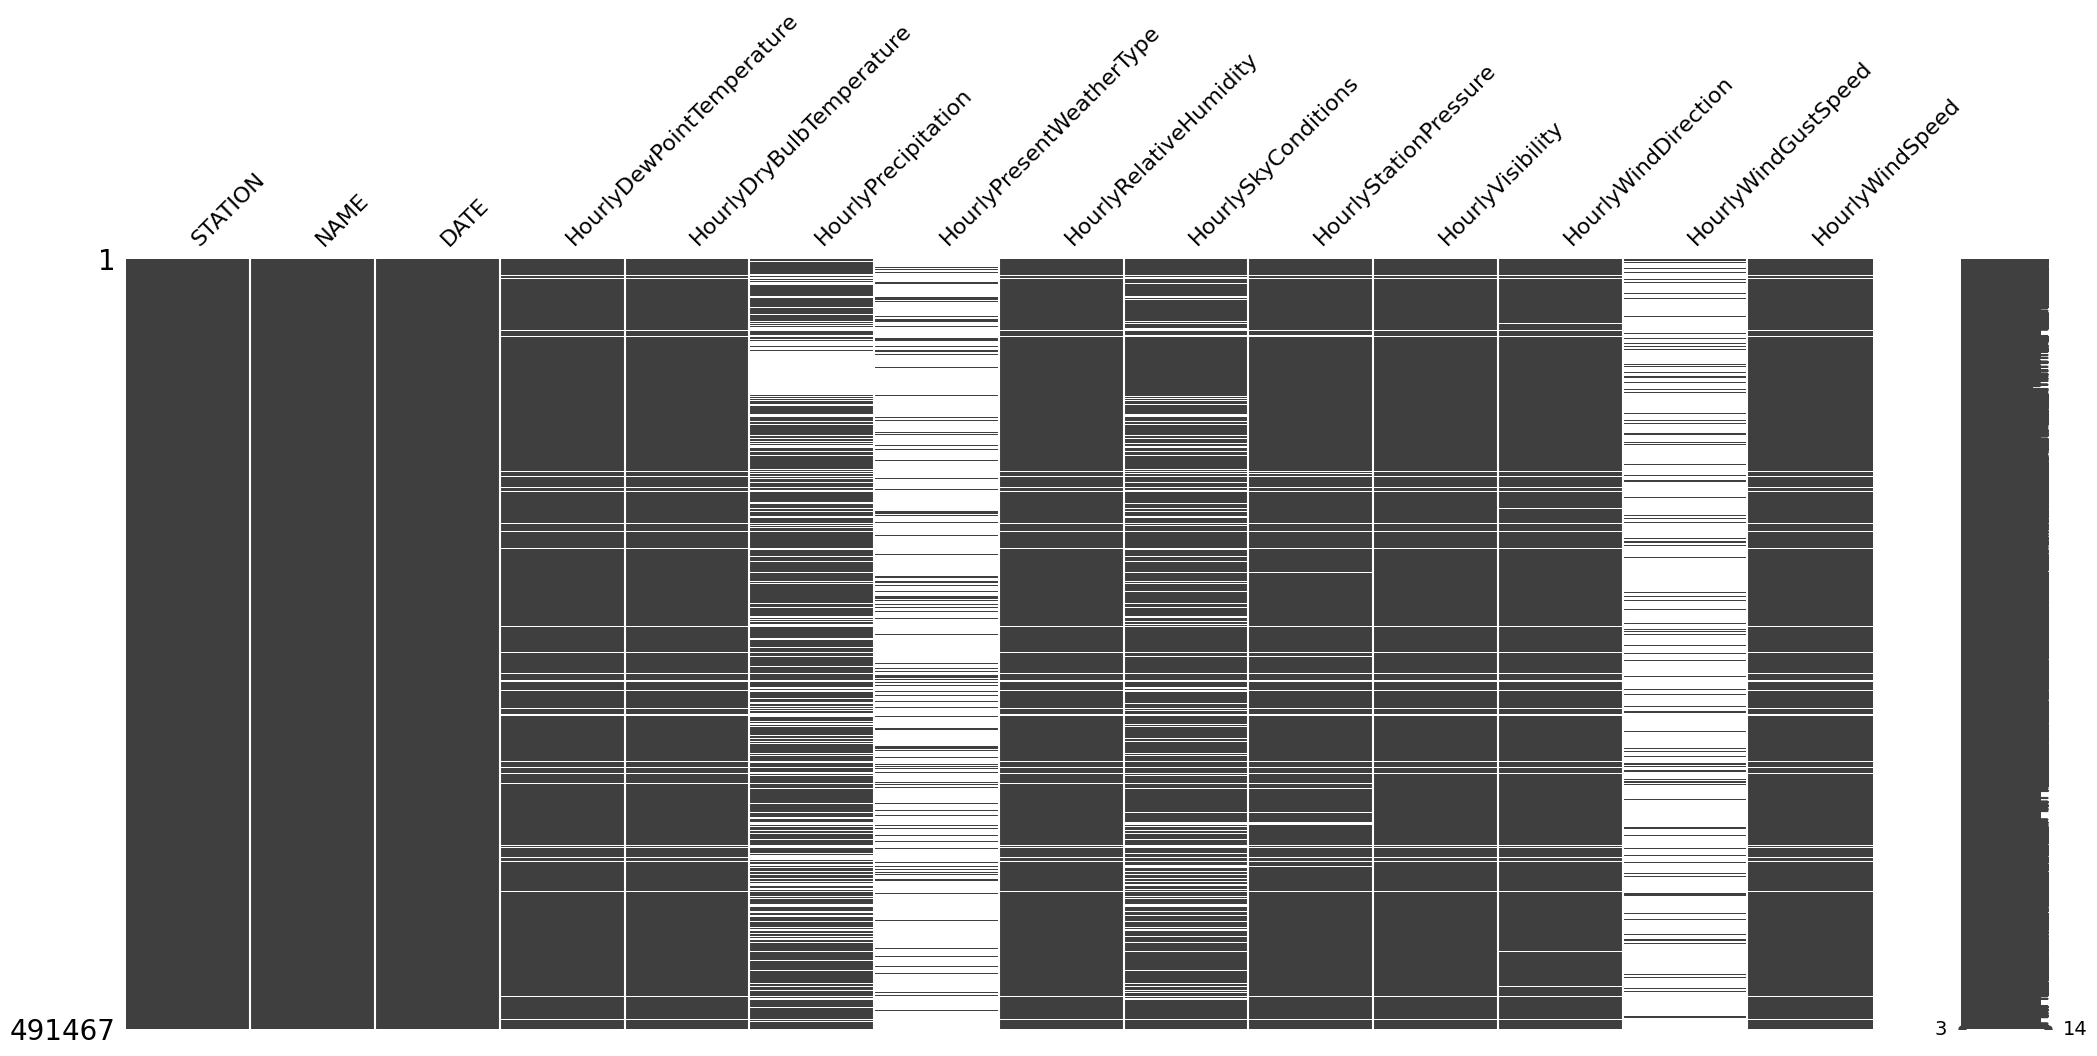

In [11]:
msno.matrix(data_selected)

In [12]:
# print the number of missing values for each column
for i in data_selected.columns:
    print(i, ": ",data_selected[i].isnull().sum())

STATION :  0
NAME :  0
DATE :  0
HourlyDewPointTemperature :  16329
HourlyDryBulbTemperature :  16255
HourlyPrecipitation :  157518
HourlyPresentWeatherType :  418183
HourlyRelativeHumidity :  16337
HourlySkyConditions :  88549
HourlyStationPressure :  22119
HourlyVisibility :  16184
HourlyWindDirection :  18491
HourlyWindGustSpeed :  434962
HourlyWindSpeed :  16535


## Fill/remove rows with missing values

In [13]:
# remove the rows from stations which seems to be missing percipitation data
data_selected = data_selected[data_selected["STATION"] != dallas_fort_worth]
data_selected = data_selected[data_selected["STATION"] != boston_logan]

<Axes: >

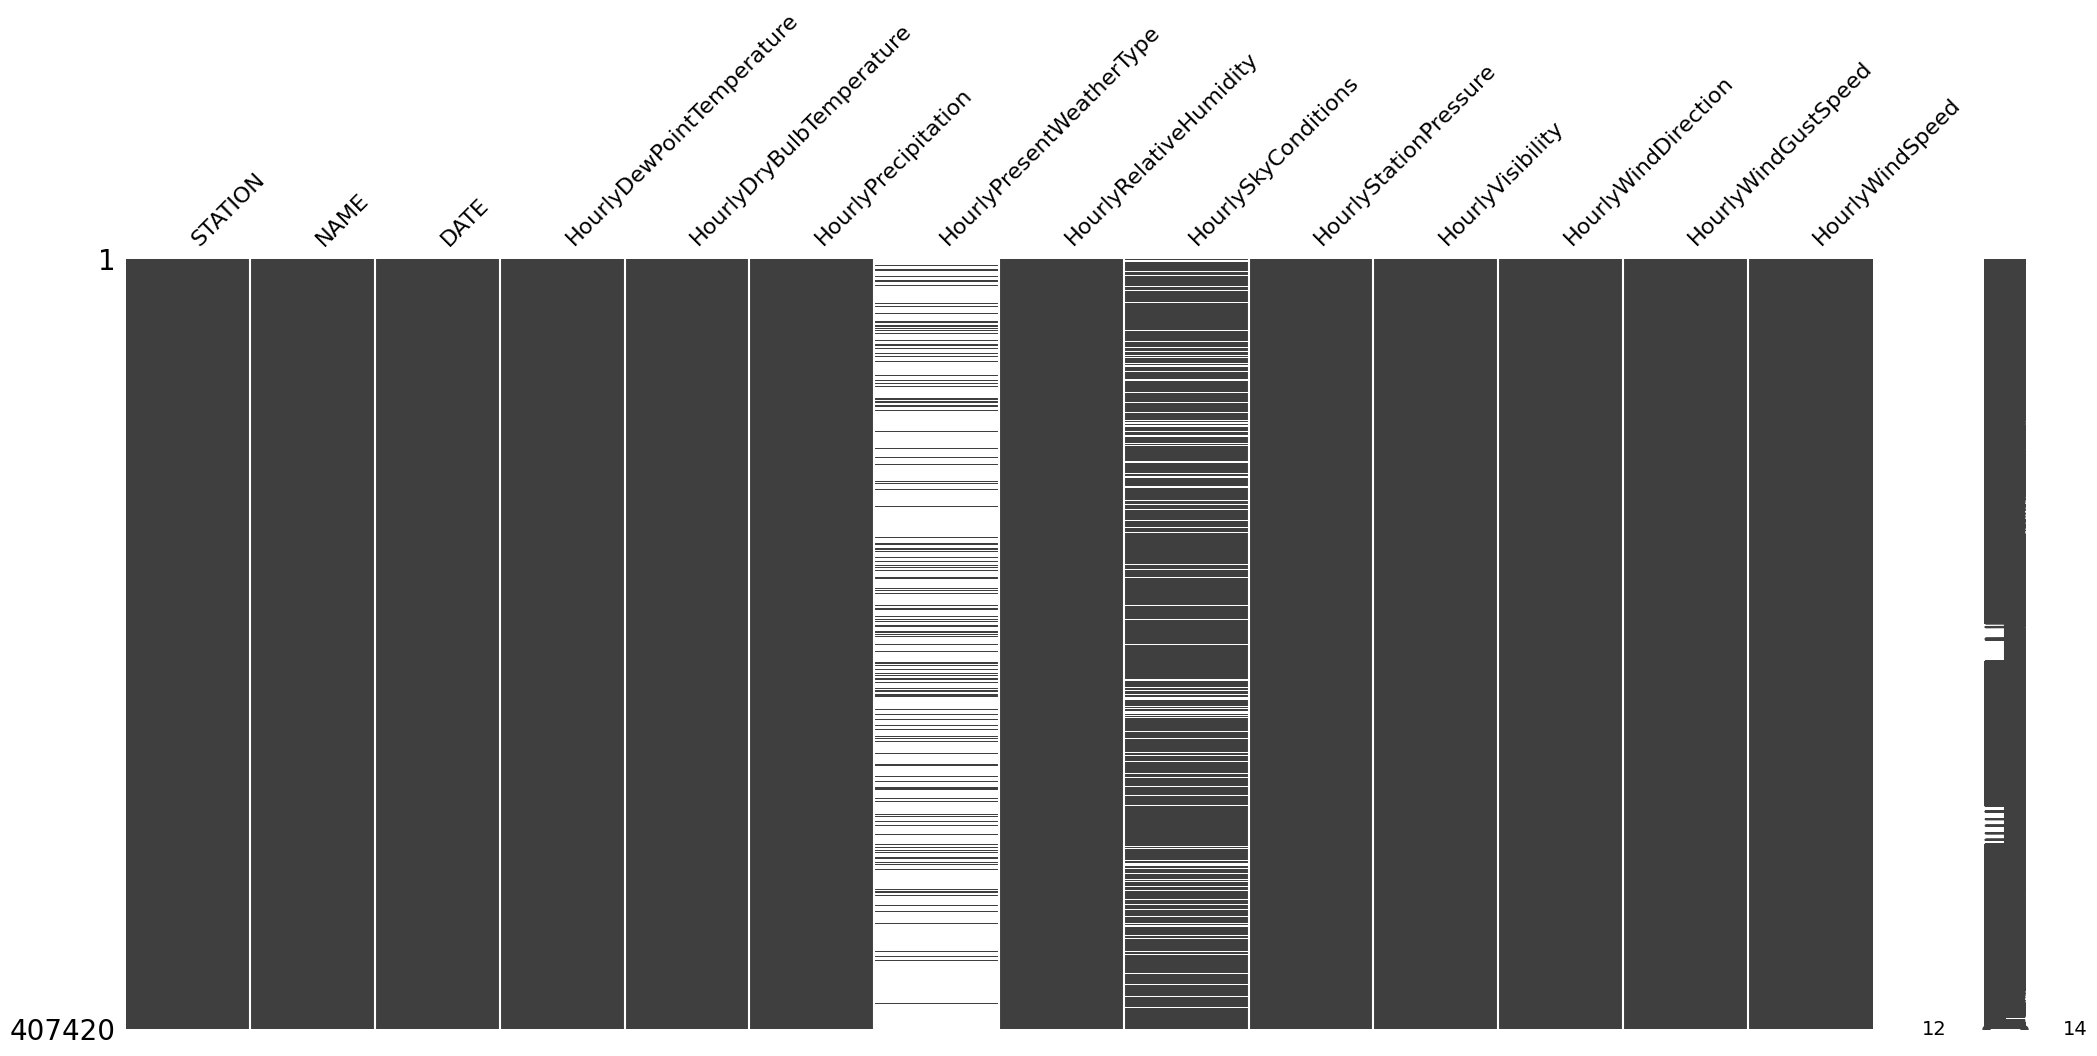

In [14]:
# Fill "HourlyWindGustSpeed" is missing with 0. This is because the missing values are when there is no gust.
data_selected["HourlyWindGustSpeed"] = data_selected["HourlyWindGustSpeed"].fillna(0.0)

# Fill "Hourlyprecipitation" with 0. This is because the missing values are when there is no precipitation.
data_selected["HourlyPrecipitation"] = data_selected["HourlyPrecipitation"].fillna(0.0)

# Remove the rows with missing values in the columns ["HourlyDewPointTemperature", "HourlyDryBulbTemperature", 
# "HourlyRelativeHumidity", "HourlyStationPressure", "HourlyVisibility", "HourlyWindDirection", "HourlyWindSpeed"]
data_selected = data_selected.dropna( subset=["HourlyDewPointTemperature", "HourlyDryBulbTemperature",
                                                "HourlyRelativeHumidity", "HourlyStationPressure",
                                                "HourlyVisibility", "HourlyWindDirection", "HourlyWindSpeed"])

msno.matrix(data_selected)

In [15]:
# print the number of missing values for each column
for i in data_selected.columns:
    print(i, ": ",data_selected[i].isnull().sum())

STATION :  0
NAME :  0
DATE :  0
HourlyDewPointTemperature :  0
HourlyDryBulbTemperature :  0
HourlyPrecipitation :  0
HourlyPresentWeatherType :  342687
HourlyRelativeHumidity :  0
HourlySkyConditions :  58519
HourlyStationPressure :  0
HourlyVisibility :  0
HourlyWindDirection :  0
HourlyWindGustSpeed :  0
HourlyWindSpeed :  0


In [16]:
# Drop the station column
data_selected = data_selected.drop(columns=["STATION"])

## Transfromations

In [17]:
# Print the type of each column before transforming
for i in data_selected.columns:
    print(i, ": ", data_selected[i].dtype)

NAME :  object
DATE :  object
HourlyDewPointTemperature :  float64
HourlyDryBulbTemperature :  float64
HourlyPrecipitation :  object
HourlyPresentWeatherType :  object
HourlyRelativeHumidity :  float64
HourlySkyConditions :  object
HourlyStationPressure :  float64
HourlyVisibility :  object
HourlyWindDirection :  object
HourlyWindGustSpeed :  object
HourlyWindSpeed :  float64


In [18]:
# Unique values for each column before transforming
for i in data_selected.columns:
    print(i, ": ",data_selected[i].unique())

NAME :  ['PHILADELPHIA INTERNATIONAL AIRPORT, PA US'
 'SEATTLE TACOMA AIRPORT, WA US' 'JFK INTERNATIONAL AIRPORT, NY US'
 'DENVER INTERNATIONAL AIRPORT, CO US'
 'NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US'
 'MCCARRAN INTERNATIONAL AIRPORT, NV US'
 'ORLANDO INTERNATIONAL AIRPORT, FL US'
 'ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPORT, GA US'
 'FORT LAUDERDALE INTERNATIONAL AIRPORT, FL US'
 'DETROIT METRO AIRPORT, MI US'
 'WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US'
 'CHICAGO OHARE INTERNATIONAL AIRPORT, IL US'
 'LOS ANGELES INTERNATIONAL AIRPORT, CA US'
 'CHARLOTTE DOUGLAS AIRPORT, NC US' 'MIAMI INTERNATIONAL AIRPORT, FL US'
 'HOUSTON INTERCONTINENTAL AIRPORT, TX US'
 'SAN FRANCISCO INTERNATIONAL AIRPORT, CA US']
DATE :  ['2021-01-01T00:54:00' '2021-01-01T01:00:00' '2021-01-01T01:54:00' ...
 '2022-12-31T15:17:00' '2022-12-31T16:01:00' '2022-12-31T16:37:00']
HourlyDewPointTemperature :  [ -5.   -5.6  -6.1  -4.4  -3.9  -3.3  -2.8  -0.6   0.    0.6   1.1   1.7
   2.2   2.8   3.3   

### Values

In [19]:
# Transform T (trace) to a small number in "HourlyPrecipitation"
data_selected["HourlyPrecipitation"] = data_selected["HourlyPrecipitation"].replace("T", 0.07)

# Transform airport name to airport code and change the name of the column to "AIRPORT"
data_selected["NAME"] = data_selected["NAME"].replace(airport_codes)
data_selected = data_selected.rename(columns={"NAME": "AIRPORT"})

# Replace X.XV in where X.X... is a float "HourlyVisibility" with X.X
data_selected["HourlyVisibility"] = data_selected['HourlyVisibility'].str.replace(r'V', '', regex=True)

# Change the row where the column "HourlyPrecipitation" is '0.040.03' to 0.035
data_selected["HourlyPrecipitation"] = data_selected["HourlyPrecipitation"].replace("0.040.03", 0.035)

# Drop the rows where the column "HourlyWindDirection" is 'VRB', direction is not determind
data_selected = data_selected[data_selected["HourlyWindDirection"] != 'VRB']


### Columns

In [20]:
# Transform the column "AIRPORT" to string
# data_selected["AIRPORT"] = data_selected["AIRPORT"].astype('category')
data_selected["AIRPORT"] = data_selected["AIRPORT"].astype(str)

# Transform the column "DATE" to datetime
data_selected["DATE"] = pd.to_datetime(data_selected["DATE"])

# Transform the column "HourlyPrecipitation", "HourlyVisibility", "HourlyWindGustSpeed" to float
data_selected["HourlyPrecipitation"] = data_selected["HourlyPrecipitation"].astype(float)
data_selected["HourlyVisibility"] = data_selected["HourlyVisibility"].astype(float)
data_selected["HourlyWindGustSpeed"] = data_selected["HourlyWindGustSpeed"].astype(float)

# Transform the column "HourlyWindDirection" to int
data_selected["HourlyWindDirection"] = data_selected["HourlyWindDirection"].astype(int)


In [21]:
# Print the type of each column after the transformation
data_selected.info()


<class 'pandas.core.frame.DataFrame'>
Index: 395164 entries, 0 to 491464
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   AIRPORT                    395164 non-null  object        
 1   DATE                       395164 non-null  datetime64[ns]
 2   HourlyDewPointTemperature  395164 non-null  float64       
 3   HourlyDryBulbTemperature   395164 non-null  float64       
 4   HourlyPrecipitation        395164 non-null  float64       
 5   HourlyPresentWeatherType   63273 non-null   object        
 6   HourlyRelativeHumidity     395164 non-null  float64       
 7   HourlySkyConditions        336679 non-null  object        
 8   HourlyStationPressure      395164 non-null  float64       
 9   HourlyVisibility           395164 non-null  float64       
 10  HourlyWindDirection        395164 non-null  int64         
 11  HourlyWindGustSpeed        395164 non-null  float64      

In [22]:
data_selected.describe()

,DATE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
count,395164,395164.000000,395164.000000,395164.000000,395164.000000,395164.000000,395164.000000,395164.000000,395164.000000,395164.000000
mean,2021-12-30 06:43:21.801023744,9.005329,16.125181,0.150507,67.454755,991.383884,14.543804,173.944329,1.345224,3.874310
min,2021-01-01 00:00:00,-32.800000,-30.000000,0.000000,2.000000,808.330000,0.000000,0.000000,0.000000,0.000000
25%,2021-07-01 11:53:45,1.100000,9.400000,0.000000,53.000000,989.840000,16.000000,80.000000,0.000000,2.000000
50%,2021-12-30 10:53:00,10.600000,17.200000,0.000000,72.000000,1006.100000,16.090000,180.000000,0.000000,4.000000
75%,2022-06-28 07:53:00,18.300000,23.900000,0.000000,85.000000,1015.240000,16.090000,270.000000,0.000000,5.000000
max,2022-12-31 23:56:00,28.300000,46.700000,91.950000,100.000000,1040.640000,19.310000,360.000000,38.000000,23.000000
std,NaN,10.658121,10.052307,1.215204,21.604141,45.402736,3.721785,110.640853,3.884418,2.528426


In [23]:
# Unique values for each column after the transformation
for i in data_selected.columns:
    print(i, ": ",data_selected[i].unique())


AIRPORT :  ['PHL' 'SEA' 'JFK' 'DEN' 'EWR' 'LAS' 'MCO' 'ATL' 'FLL' 'DTW' 'IAD' 'ORD'
 'LAX' 'CLT' 'MIA' 'IAH' 'SFO']
DATE :  <DatetimeArray>
['2021-01-01 00:54:00', '2021-01-01 01:00:00', '2021-01-01 01:54:00',
 '2021-01-01 02:54:00', '2021-01-01 03:54:00', '2021-01-01 04:54:00',
 '2021-01-01 05:54:00', '2021-01-01 06:54:00', '2021-01-01 07:00:00',
 '2021-01-01 07:54:00',
 ...
 '2022-12-30 22:08:00', '2022-12-31 01:15:00', '2022-12-31 02:37:00',
 '2022-12-31 05:04:00', '2022-12-31 05:47:00', '2022-12-31 07:18:00',
 '2022-12-31 14:03:00', '2022-12-31 15:17:00', '2022-12-31 16:01:00',
 '2022-12-31 16:37:00']
Length: 147829, dtype: datetime64[ns]
HourlyDewPointTemperature :  [ -5.   -5.6  -6.1  -4.4  -3.9  -3.3  -2.8  -0.6   0.    0.6   1.1   1.7
   2.2   2.8   3.3   3.9   4.4   5.   -1.1  -1.7  -2.2  -6.7  -7.8  -9.4
 -10.6 -11.1 -10.  -11.7 -12.8  -8.9  -8.3  -7.2   5.6   6.1   6.7   7.2
   7.8   8.3 -12.2 -14.4 -15.6 -13.9 -15.  -13.3 -16.7 -17.2 -16.1   8.9
 -17.8  10.6   9.4 -18.9 -18

<Axes: >

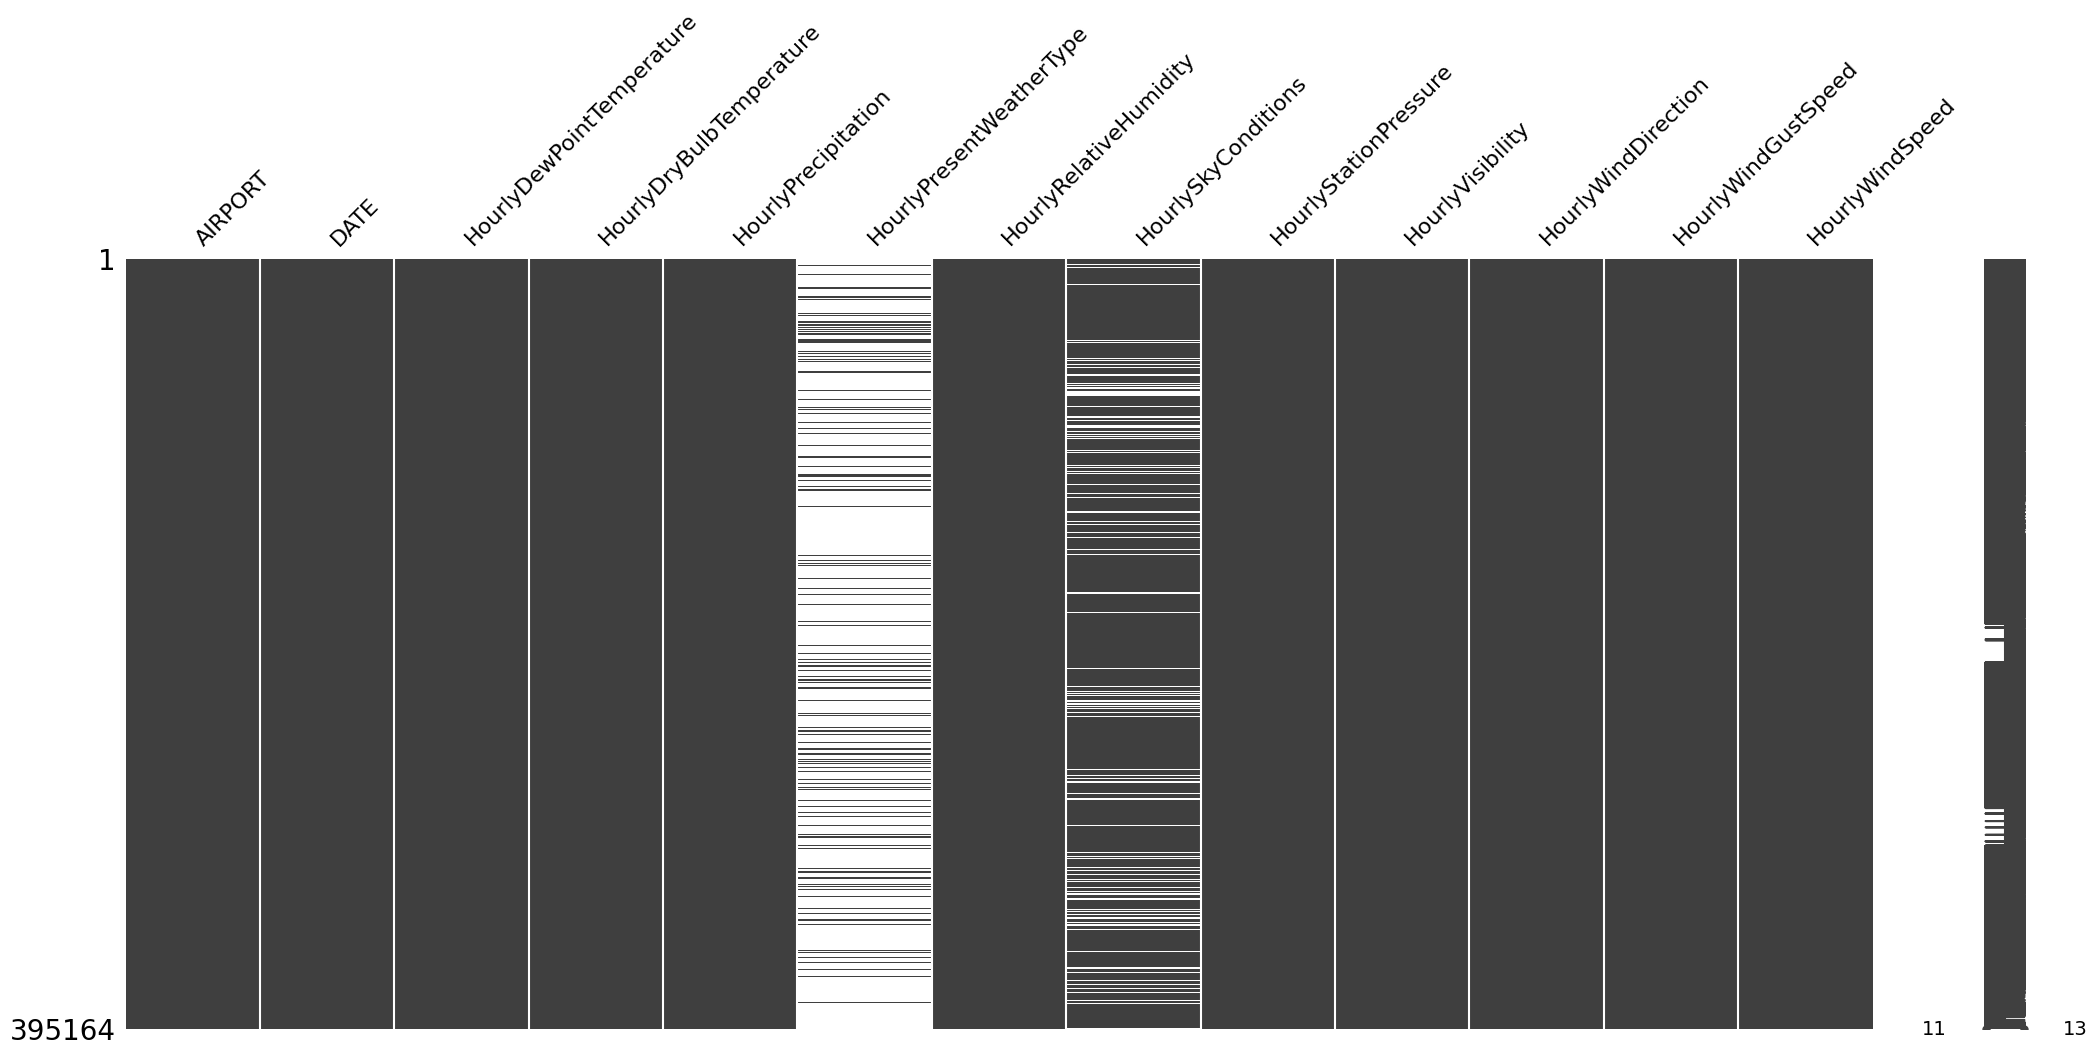

In [24]:
msno.matrix(data_selected)

In [25]:
# print the number of missing values for each column
for i in data_selected.columns:
    print(i, ": ",data_selected[i].isnull().sum())

AIRPORT :  0
DATE :  0
HourlyDewPointTemperature :  0
HourlyDryBulbTemperature :  0
HourlyPrecipitation :  0
HourlyPresentWeatherType :  331891
HourlyRelativeHumidity :  0
HourlySkyConditions :  58485
HourlyStationPressure :  0
HourlyVisibility :  0
HourlyWindDirection :  0
HourlyWindGustSpeed :  0
HourlyWindSpeed :  0


In [26]:
print("----------------------------------------")
for hour in range(0,24):
    print("Total number of datetimes with hour == ", hour, ": ", len(data_selected[ data_selected["DATE"].dt.hour == hour ]))

print("----------------------------------------")
# distribution of the number of dates per airport
for i in airport_codes.values():
    print("Total number of datetimes for airport ", i, ": ", len(data_selected[ data_selected["AIRPORT"] == i ]))

----------------------------------------
Total number of datetimes with hour ==  0 :  15670
Total number of datetimes with hour ==  1 :  20748
Total number of datetimes with hour ==  2 :  15167
Total number of datetimes with hour ==  3 :  14556
Total number of datetimes with hour ==  4 :  19797
Total number of datetimes with hour ==  5 :  15616
Total number of datetimes with hour ==  6 :  16370
Total number of datetimes with hour ==  7 :  21126
Total number of datetimes with hour ==  8 :  15092
Total number of datetimes with hour ==  9 :  14092
Total number of datetimes with hour ==  10 :  18253
Total number of datetimes with hour ==  11 :  14001
Total number of datetimes with hour ==  12 :  14777
Total number of datetimes with hour ==  13 :  19365
Total number of datetimes with hour ==  14 :  14491
Total number of datetimes with hour ==  15 :  14032
Total number of datetimes with hour ==  16 :  18917


Total number of datetimes with hour ==  17 :  14845
Total number of datetimes with hour ==  18 :  15433
Total number of datetimes with hour ==  19 :  20436
Total number of datetimes with hour ==  20 :  14721
Total number of datetimes with hour ==  21 :  13961
Total number of datetimes with hour ==  22 :  18965
Total number of datetimes with hour ==  23 :  14733
----------------------------------------
Total number of datetimes for airport  PHL :  23775
Total number of datetimes for airport  SEA :  25166
Total number of datetimes for airport  JFK :  25554
Total number of datetimes for airport  DEN :  24979
Total number of datetimes for airport  EWR :  22056
Total number of datetimes for airport  LAS :  19445
Total number of datetimes for airport  MCO :  22758
Total number of datetimes for airport  ATL :  23418
Total number of datetimes for airport  FLL :  19889
Total number of datetimes for airport  DTW :  27508
Total number of datetimes for airport  IAD :  22601
Total number of datetim

## Fix date columns

In [27]:
print("Total number of dates before removing: ", len(data_selected))

# Sample the first row of each hour
data_selected.set_index(["AIRPORT", "DATE"], inplace=True)
data_selected.sort_index(inplace=True)
data_selected = data_selected.groupby([pd.Grouper(level='AIRPORT'), pd.Grouper(level='DATE', freq='H')], observed=True).first()
data_selected.reset_index(inplace=True)

# data_selected = data_selected.drop_duplicates(subset=["AIRPORT", "DATE"])

print("----------------------------------------")
for hour in range(0,24):
    print("Total number of dates with hour == ", hour, ": ", len(data_selected[ data_selected["DATE"].dt.hour == hour ]))

print("----------------------------------------")
# distribution of the number of dates per airport
for i in airport_codes.values():
    print("Total number of dates for airport ", i, ": ", len(data_selected[ data_selected["AIRPORT"] == i ]))

print("----------------------------------------")
print("Total number of dates after removing duplicates: ", len(data_selected))

# Change the name of the date column to "AIRPORT_DATETIME"
data_selected = data_selected.rename(columns={"DATE": "AIRPORT_DATETIME"})


Total number of dates before removing:  395164


----------------------------------------
Total number of dates with hour ==  0 :  12262
Total number of dates with hour ==  1 :  12325
Total number of dates with hour ==  2 :  12269
Total number of dates with hour ==  3 :  12265
Total number of dates with hour ==  4 :  12304
Total number of dates with hour ==  5 :  12180
Total number of dates with hour ==  6 :  12141
Total number of dates with hour ==  7 :  12148
Total number of dates with hour ==  8 :  11760
Total number of dates with hour ==  9 :  11507
Total number of dates with hour ==  10 :  11606
Total number of dates with hour ==  11 :  11299
Total number of dates with hour ==  12 :  11335
Total number of dates with hour ==  13 :  11830
Total number of dates with hour ==  14 :  11664
Total number of dates with hour ==  15 :  11827
Total number of dates with hour ==  16 :  12225
Total number of dates with hour ==  17 :  12171
Total number of dates with hour ==  18 :  12213
Total number of dates with hour ==  19 :  12292
Total num

## Verification

In [28]:
data_selected.describe()

,AIRPORT_DATETIME,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
count,288377,288377.000000,288377.000000,288377.000000,288377.000000,288377.000000,288377.000000,288377.000000,288377.000000,288377.000000
mean,2021-12-30 21:14:13.208126720,8.836717,16.596240,0.044710,64.961509,992.283744,15.106249,174.840944,1.173616,3.808019
min,2021-01-01 00:00:00,-32.200000,-30.000000,0.000000,2.000000,808.330000,0.000000,0.000000,0.000000,0.000000
25%,2021-07-01 15:00:00,1.100000,10.000000,0.000000,51.000000,990.520000,16.000000,80.000000,0.000000,2.000000
50%,2021-12-30 13:00:00,10.600000,17.800000,0.000000,69.000000,1006.770000,16.090000,190.000000,0.000000,4.000000
75%,2022-06-30 12:00:00,17.800000,24.400000,0.000000,82.000000,1015.240000,16.090000,270.000000,0.000000,5.000000
max,2022-12-31 23:00:00,28.300000,46.700000,45.970000,100.000000,1040.640000,19.310000,360.000000,33.000000,23.000000
std,NaN,10.686701,9.945928,0.431455,21.554238,44.402294,2.923799,110.753933,3.612635,2.496505


In [29]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288377 entries, 0 to 288376
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   AIRPORT                    288377 non-null  object        
 1   AIRPORT_DATETIME           288377 non-null  datetime64[ns]
 2   HourlyDewPointTemperature  288377 non-null  float64       
 3   HourlyDryBulbTemperature   288377 non-null  float64       
 4   HourlyPrecipitation        288377 non-null  float64       
 5   HourlyPresentWeatherType   33995 non-null   object        
 6   HourlyRelativeHumidity     288377 non-null  float64       
 7   HourlySkyConditions        285427 non-null  object        
 8   HourlyStationPressure      288377 non-null  float64       
 9   HourlyVisibility           288377 non-null  float64       
 10  HourlyWindDirection        288377 non-null  int64         
 11  HourlyWindGustSpeed        288377 non-null  float64 

In [30]:
data_selected.head()

,AIRPORT,AIRPORT_DATETIME,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyRelativeHumidity,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
0,ATL,2021-01-01 00:00:00,12.8,13.3,0.76,-RA:02 BR:1 |s RA s |RA s,97.0,OVC:08 0.61,982.05,0.4,140,0.0,4.0
1,ATL,2021-01-01 01:00:00,12.8,13.3,0.00,||RA,97.0,None,981.71,0.4,140,0.0,4.0
2,ATL,2021-01-01 02:00:00,13.9,14.4,0.25,-DZ:01 BR:1 |s DZ s |DZ s,97.0,OVC:08 0.91,981.38,0.4,110,0.0,4.0
3,ATL,2021-01-01 03:00:00,13.9,14.4,0.25,-RA:02 BR:1 |s RA s |RA s,97.0,OVC:08 0.61,981.04,0.4,120,0.0,4.0
4,ATL,2021-01-01 04:00:00,13.9,15.0,0.07,BR:1 |s |,93.0,None,980.70,0.4,120,0.0,5.0


In [31]:
data_selected.tail()

,AIRPORT,AIRPORT_DATETIME,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyRelativeHumidity,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
288372,SFO,2022-12-31 19:00:00,11.1,12.8,0.07,None,88.0,FEW:02 1.52 BKN:07 12.19 OVC:08 33.53,1005.42,16.09,270,12.0,8.0
288373,SFO,2022-12-31 20:00:00,10.0,12.2,0.00,None,88.0,FEW:02 1.52 SCT:04 19.81,1006.43,16.09,280,12.0,7.0
288374,SFO,2022-12-31 21:00:00,10.0,12.2,0.00,None,87.0,FEW:02 18.29,1006.77,16.09,280,0.0,6.0
288375,SFO,2022-12-31 22:00:00,10.0,12.2,0.00,None,87.0,BKN:07 19.81,1004.40,16.00,280,0.0,6.0
288376,SFO,2022-12-31 23:00:00,8.3,12.2,0.00,None,77.0,BKN:07 24.38,1007.79,16.09,270,0.0,7.0


<Axes: >

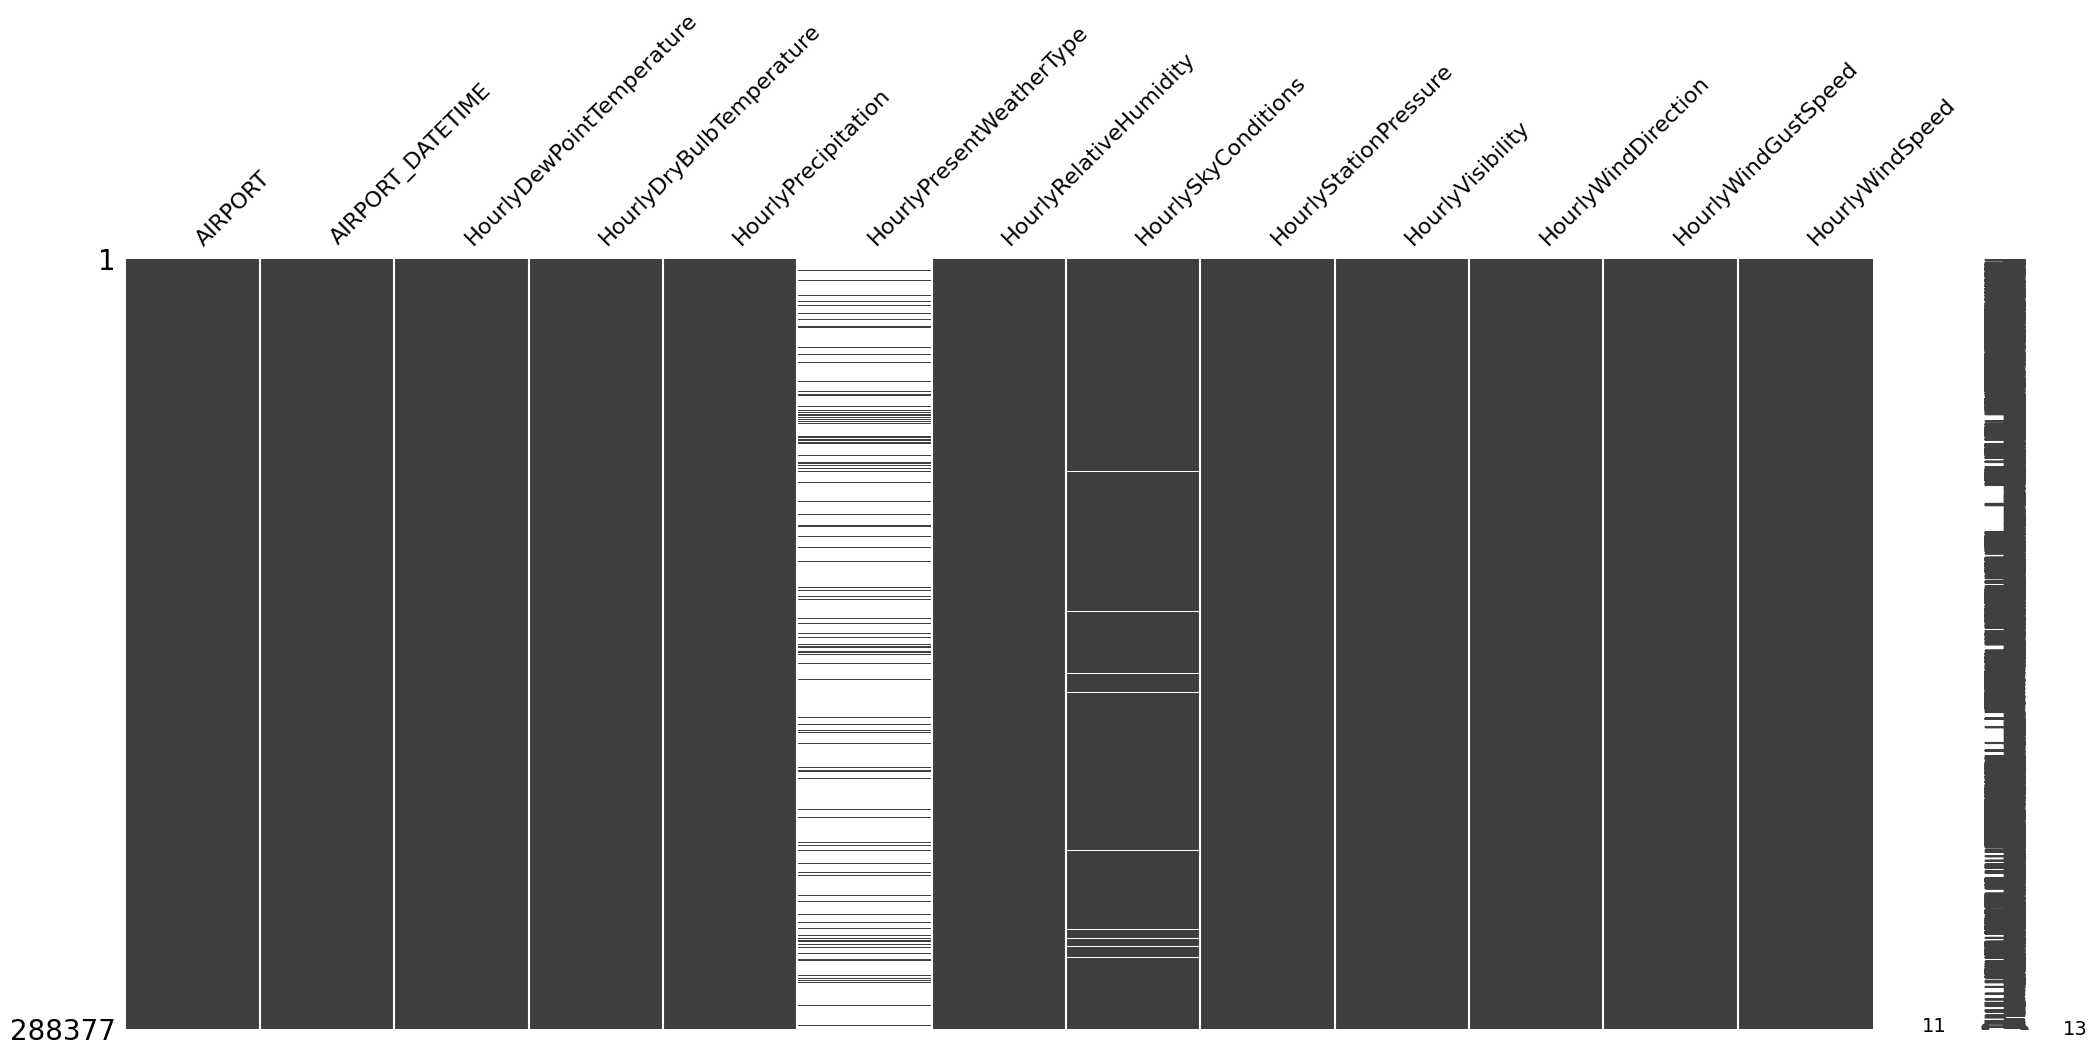

In [32]:
msno.matrix(data_selected)

In [33]:
# print the number of missing values for each column
for i in data_selected.columns:
    print(i, ": ",data_selected[i].isnull().sum())

AIRPORT :  0
AIRPORT_DATETIME :  0
HourlyDewPointTemperature :  0
HourlyDryBulbTemperature :  0
HourlyPrecipitation :  0
HourlyPresentWeatherType :  254382
HourlyRelativeHumidity :  0
HourlySkyConditions :  2950
HourlyStationPressure :  0
HourlyVisibility :  0
HourlyWindDirection :  0
HourlyWindGustSpeed :  0
HourlyWindSpeed :  0


## Save data

In [34]:
# Save the data to a csv file
data_selected.to_csv("../data/processed/us_airport_weather_2021_2022_date_fixed.csv", index=False)